# Standard Scaling

In [96]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [97]:
# make an example dataset
df = {
    'age' : [25,30,35,40,45],
    'height' : [165,170,175,180,185],
    'weight' : [55,60,65,70,75]
}
df = pd.DataFrame(df)
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [98]:
# import the scalar
scalar = StandardScaler()

# fit the scalar in data
scaled_df = scalar.fit_transform(df)
# convert the data into pandas data frame
df = pd.DataFrame(scaled_df, columns=df.columns)
df

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


# Min-Max Scaler

In [99]:
# make an example dataset
df = {
    'age' : [25,30,35,40,45],
    'height' : [165,170,175,180,185],
    'weight' : [55,60,65,70,75]
}
df = pd.DataFrame(df)
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [100]:
# import the scalar
scalar = MinMaxScaler()

# fit the scalar in data
scaled_df = scalar.fit_transform(df)
# convert the data into pandas data frame
df = pd.DataFrame(scaled_df, columns=df.columns)
df

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


# MaxAbs Scaler

In [101]:
# make an example dataset
df = {
    'age' : [25,30,35,40,45],
    'height' : [165,170,175,180,185],
    'weight' : [55,60,65,70,75]
}
df = pd.DataFrame(df)
df

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


In [102]:
# improt the scaler
scalar = MaxAbsScaler()
# fit the scalar into a data
scaled_df = scalar.fit_transform(df)
# convert the data into pandas dataframe
df = pd.DataFrame(scaled_df, columns=df.columns)
df

,age,height,weight
0,0.555556,0.891892,0.733333
1,0.666667,0.918919,0.800000
2,0.777778,0.945946,0.866667
3,0.888889,0.972973,0.933333
4,1.000000,1.000000,1.000000


# Robust Scaler 

In [103]:
from sklearn.preprocessing import RobustScaler
# improt the scaler
scalar = RobustScaler()
# fit the scalar into a data
scaled_df = scalar.fit_transform(df)
# convert the data into pandas dataframe
df = pd.DataFrame(scaled_df, columns=df.columns)
df

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


---
# Transformation

In [104]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [105]:
# generate non-normal data (exponantial distribution)
np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns=["values"])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

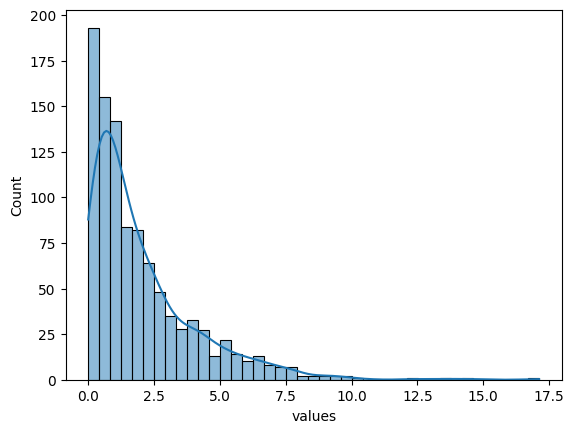

In [106]:
sns.histplot(df['values'], kde=True)

In [107]:
from sklearn.preprocessing import PowerTransformer, QuantileTransformer

pt_boxcox = PowerTransformer(method="box-cox")
pt_yeo = PowerTransformer(method="yeo-johnson")
qt_normal = QuantileTransformer(output_distribution="normal")

# boxcox ke liya data must be positive
df["Box_Cox"] = pt_boxcox.fit_transform(df[["values"]])
df["Box_yei"] = pt_yeo.fit_transform(df[["values"]])
df["qt_normal"] = qt_normal.fit_transform(df[["values"]])

In [108]:
df.head()

,values,Box_Cox,Box_yei,qt_normal
0,1.591749,0.158969,0.179335,0.162552
1,2.511862,0.602906,0.677331,0.587964
2,1.846446,0.298068,0.339698,0.286135
3,1.574402,0.148897,0.167607,0.157469
4,1.102097,-0.164776,-0.202107,-0.154930


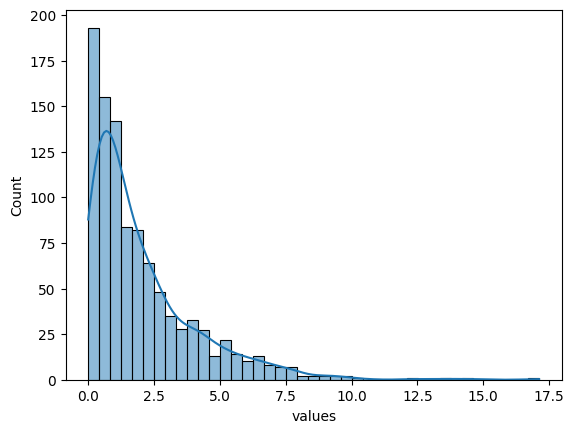

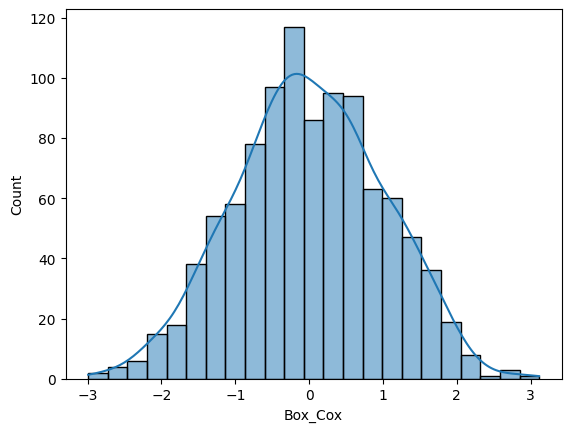

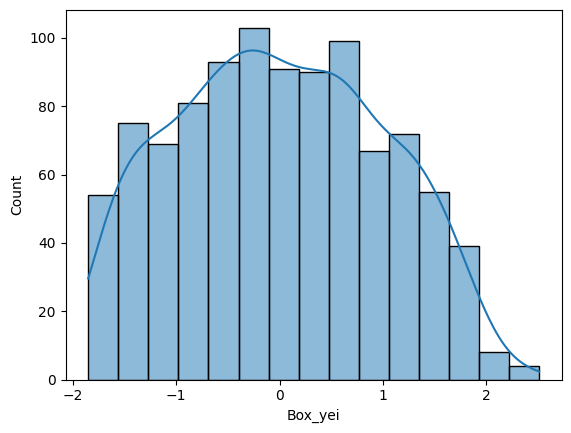

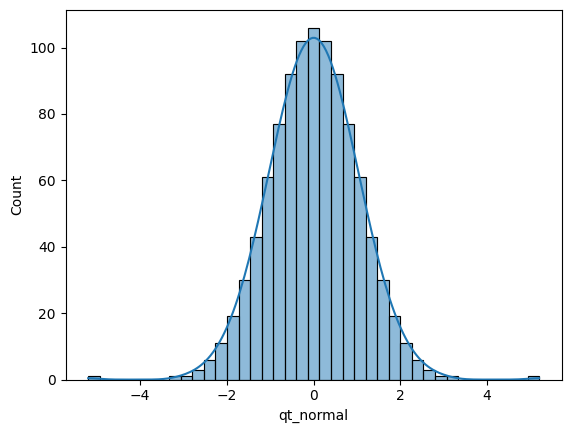

In [109]:
# create a histogram
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()

---
# Normalization

In [110]:
# Normalization with L2 Normalizer
from sklearn.preprocessing import Normalizer

data = [[1,1,1], [1,1,0], [1,0,0]]
normalizer = Normalizer(norm="l2")
print(normalizer.fit_transform(data))

[[0.57735027 0.57735027 0.57735027]
 [0.70710678 0.70710678 0.        ]
 [1.         0.         0.        ]]


In [111]:
# Normalization with L1 Normalizer
data = [[1,1,1], [1,1,0], [1,0,0]]
normalizer = Normalizer(norm="l1")
print(normalizer.fit_transform(data))

[[0.33333333 0.33333333 0.33333333]
 [0.5        0.5        0.        ]
 [1.         0.         0.        ]]


# Log Transformation

In [112]:
import pandas as pd
import numpy as np
# create a skewed data
df = {"values" : [1,5,10,20,50,100,200,500,1000,2000,5000,10000,20000,50000,100000]}
df = pd.DataFrame(df)

In [113]:
df['log_values'] = np.log(df['values'])
df.head()

,values,log_values
0,1,0.000000
1,5,1.609438
2,10,2.302585
3,20,2.995732
4,50,3.912023


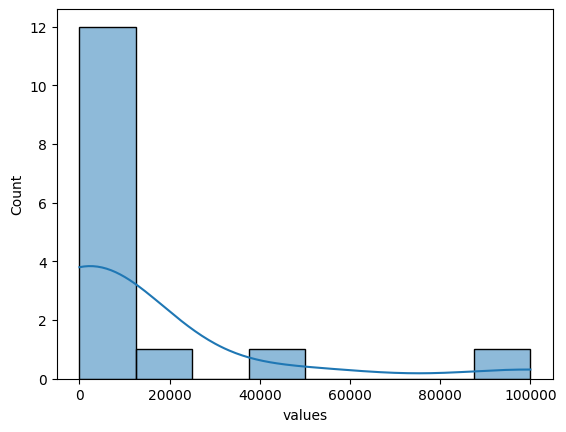

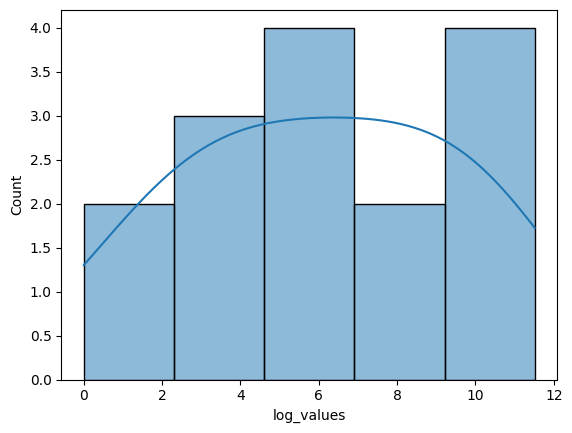

In [114]:
for col in df.columns:
    sns.histplot(df[col], kde=True)
    plt.show()